<a href="https://colab.research.google.com/github/Juansecod/bi-mineria-ucc/blob/main/used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
data = pd.read_csv("./drive/MyDrive/BI/datasets/used_cars_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
# get all unique rows in each column
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [ ]:
# get the total of null values in rows for each column
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [26]:
# Remove 'S.No' column from dataset
data = data.drop(['S.No.'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [27]:
data = data.drop(['New_Price'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


In [28]:
from datetime import date

current_year = date.today().year
data['Car_Age'] = current_year - data['Year']

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [30]:
data['Brand'] = data['Name'].str.split().str.get(0)

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11,Audi


In [31]:
data['Model'] = data['Name'].str.split().str.slice(start=1).str.join(" ")

data[['Brand','Model', 'Name']]

,Brand,Model,Name
0,Maruti,Wagon R LXI CNG,Maruti Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option
2,Honda,Jazz V,Honda Jazz V
3,Maruti,Ertiga VDI,Maruti Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic
...,...,...,...
7248,Volkswagen,Vento Diesel Trendline,Volkswagen Vento Diesel Trendline
7249,Volkswagen,Polo GT TSI,Volkswagen Polo GT TSI
7250,Nissan,Micra Diesel XV,Nissan Micra Diesel XV
7251,Volkswagen,Polo GT TSI,Volkswagen Polo GT TSI


In [32]:
cat_col = data.select_dtypes(include='object').columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

print(f'Categorical columns: {cat_col}')
print(f'Numerical columns: {num_col}')

Categorical columns: Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Brand', 'Model'],
      dtype='object')
Numerical columns: ['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew:  -0.84


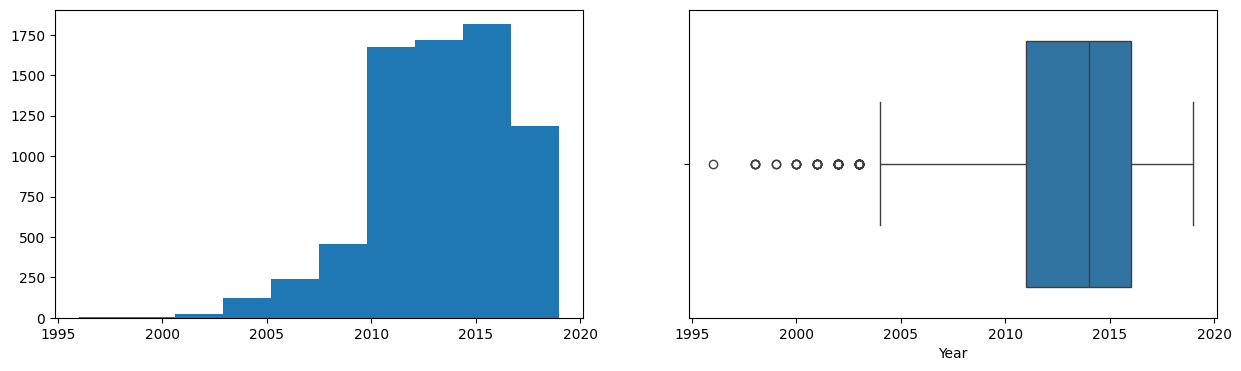

Kilometers_Driven
Skew:  61.58


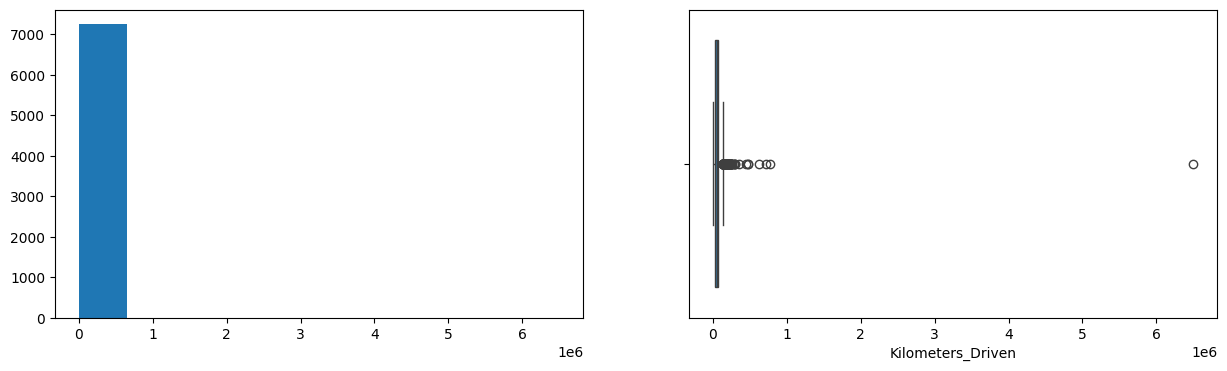

Seats
Skew:  1.9


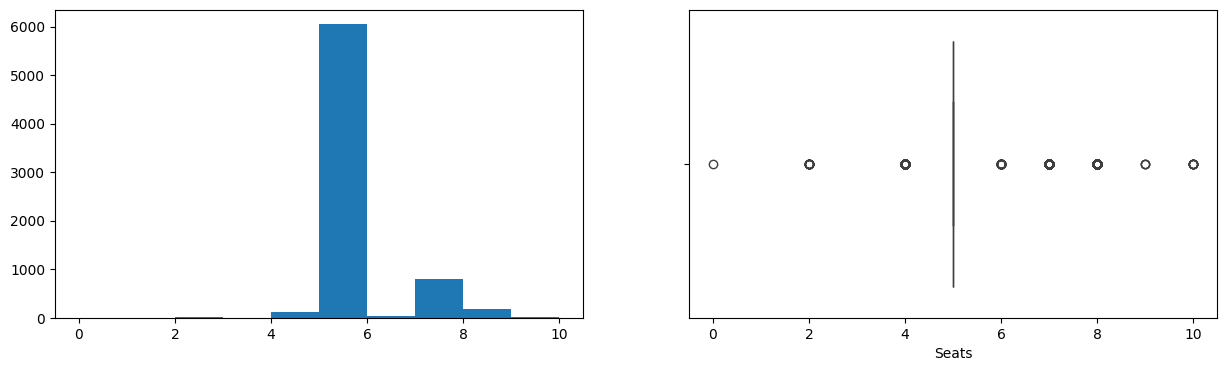

Price
Skew:  3.34


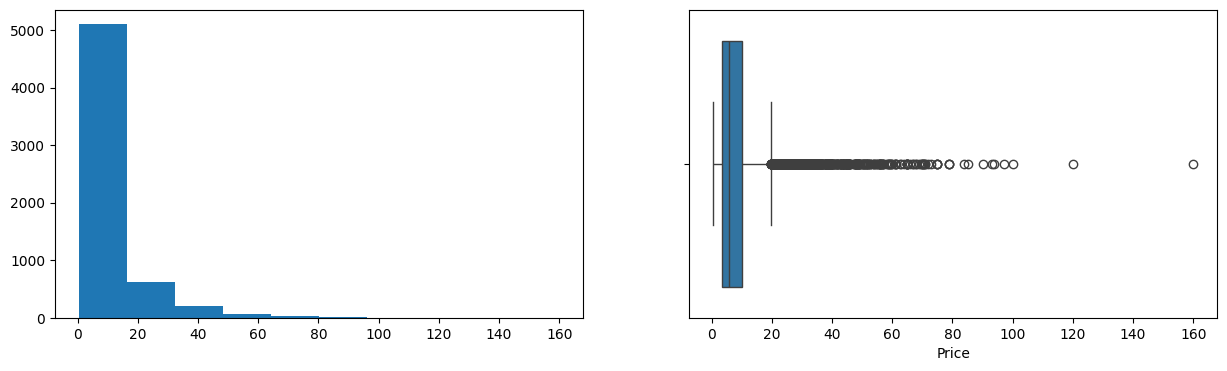

Car_Age
Skew:  0.84


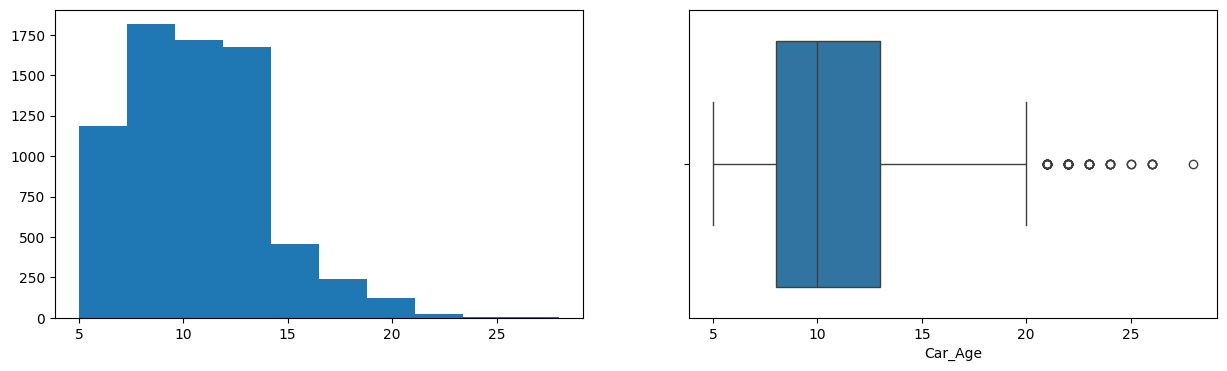

In [33]:
for col in num_col:
  print(col)
  print("Skew: ", round(data[col].skew(), 2))
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  data[col].hist(grid=False)
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

<Axes: xlabel='Fuel_Type', ylabel='count'>

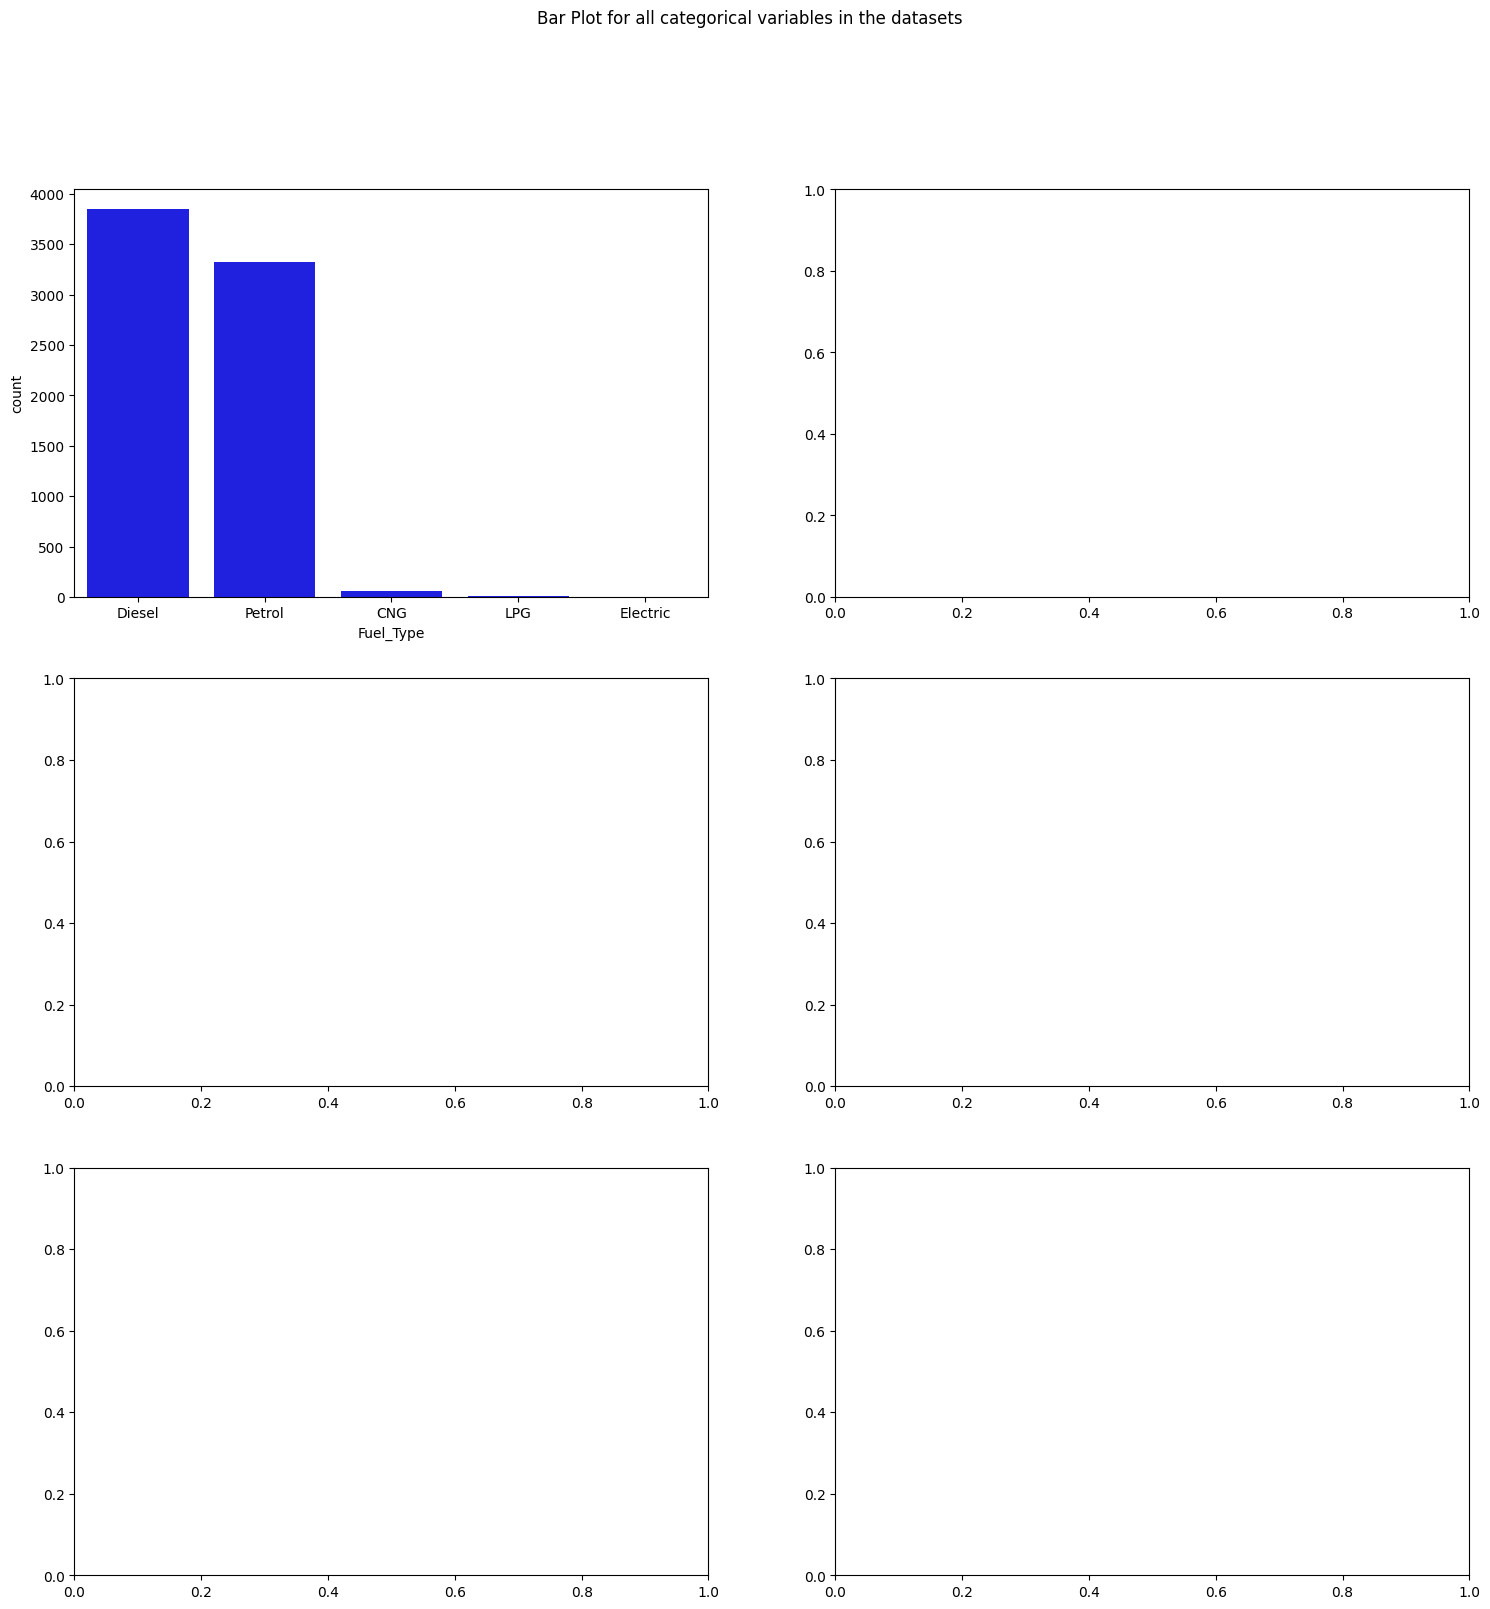

In [47]:
fig, axes = plt.subplots(3,2, figsize=(18,18))
fig.suptitle('Bar Plot for all categorical variables in the datasets')
sns.countplot(ax= axes[0,0], x='Fuel_Type', data=data, color="blue", order=data['Fuel_Type'].value_counts().index)
sns.countplot(ax= axes[0,0], x='Fuel_Type', data=data, color="blue", order=data['Fuel_Type'].value_counts().index)
sns.countplot(ax= axes[0,0], x='Fuel_Type', data=data, color="blue", order=data['Fuel_Type'].value_counts().index)
sns.countplot(ax= axes[0,0], x='Fuel_Type', data=data, color="blue", order=data['Fuel_Type'].value_counts().index)
sns.countplot(ax= axes[0,0], x='Fuel_Type', data=data, color="blue", order=data['Fuel_Type'].value_counts().index)
sns.countplot(ax= axes[0,0], x='Fuel_Type', data=data, color="blue", order=data['Fuel_Type'].value_counts().index)

In [ ]:
# Se usa para cuando hay muchos datos atipicos, se logran visualizar en el grafico de caja-bigote
def log_transform(data, col):
  for colname in col:
    if(data[colname]==1.0).all():
      data[colname + "_log"] = np.log(data[colname] + 1)
    else:
      data[colname + "_log"] = np.log(data[colname])
  data.info()

In [35]:
log_transform(data, ['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  Price                  6019 non-null   float64
 12  Car_Age                7253 non-null   int64  
 13  Brand                  7253 non-null   object 
 14  Model                  7253 non-null   object 
 15  Kilo

<Axes: xlabel='Kilometers_Driven_log', ylabel='Density'>

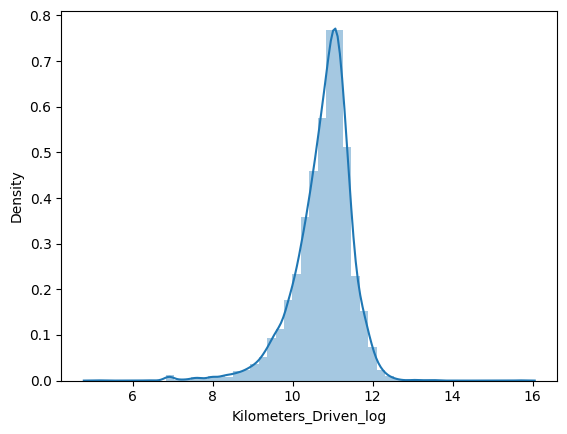

In [39]:
sns.distplot(data['Kilometers_Driven_log'])

<Axes: xlabel='Price_log', ylabel='Density'>

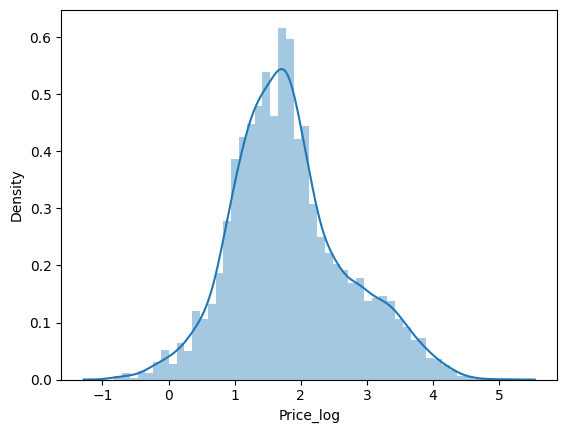

In [40]:
sns.distplot(data['Price_log'])

<Figure size 1300x1700 with 0 Axes>

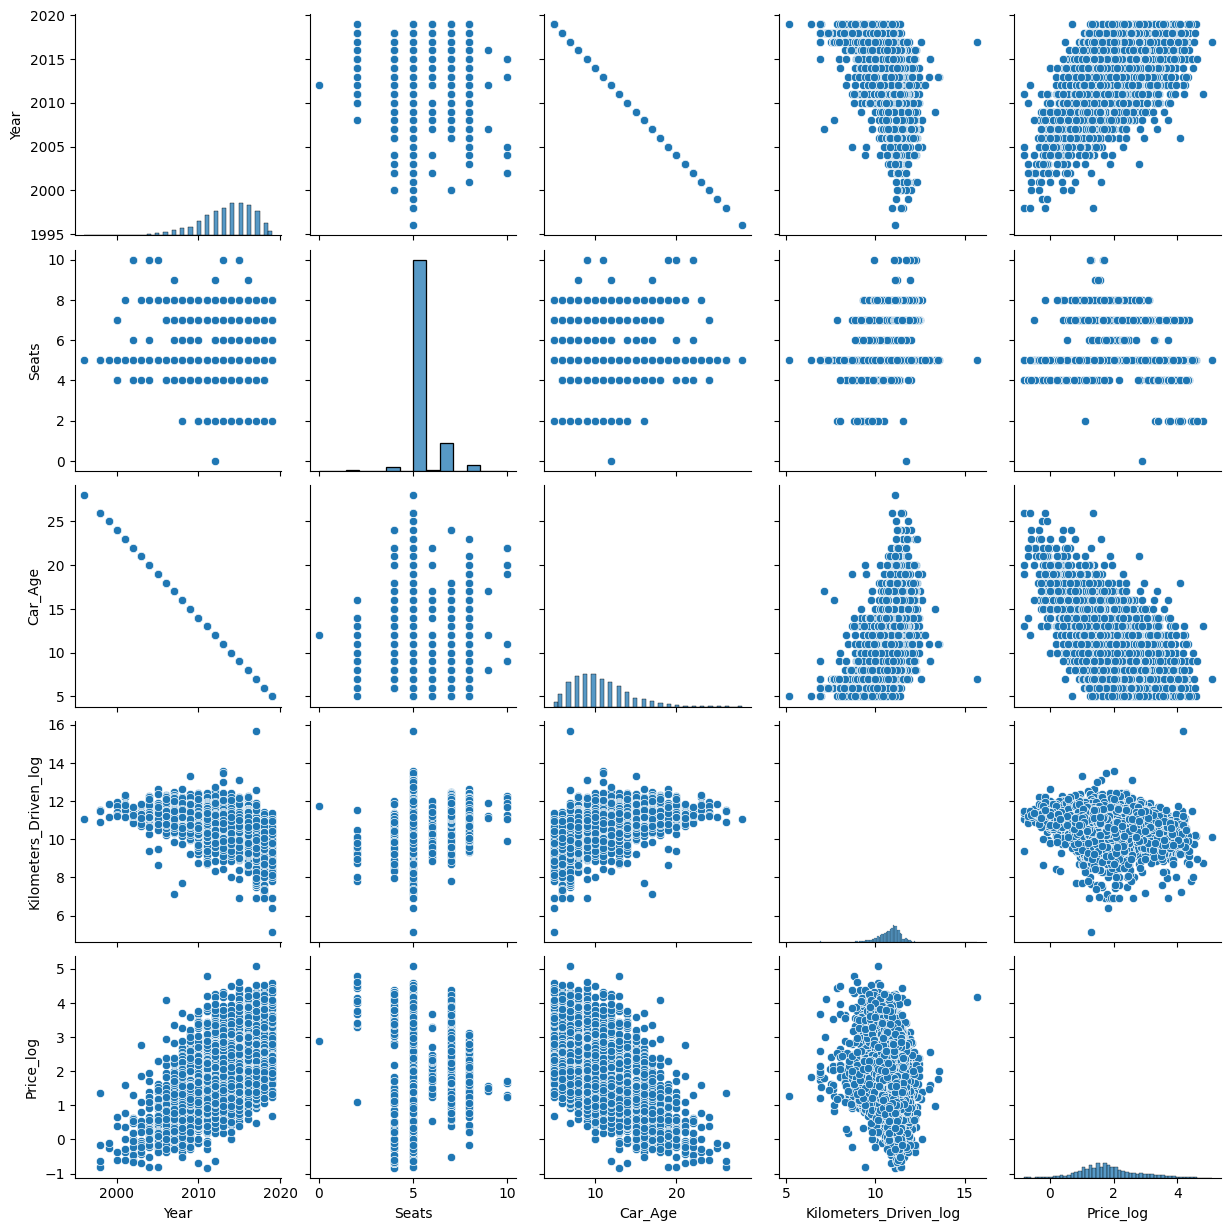

In [44]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'], axis=1))
plt.show()